# Customer Churn  Prediction (TeleComm.)

The objective of these notebooks is to evaluate the effectiveness of algorithms on an untuned dataset. This approach follows a data-centric perspective, where we aim to comprehend how data quality significantly influences performance.

To grasp the concept of data-centricity in machine learning, here's a concise definition:

Data-centric machine learning entails prioritizing the quality, relevance, and accessibility of the data employed in machine learning models. In this approach, the emphasis extends beyond algorithms and models, encompassing the entire data lifecycle, from collection and preprocessing to feature engineering and evaluation.

## Reading Data and Cleaning

In this section, we will start by reading the customer churn dataset and performing necessary data cleaning steps. The dataset may contain missing values, duplicate entries, or irrelevant columns that need to be addressed before proceeding with further analysis.

1. Load the customer churn dataset using suitable method (for our case; `pandas.read_csv()`).
2. Check for missing values in the dataset and handle them appropriately (e.g., dropping rows or imputing missing values).
3. Identify and remove any duplicate entries in the dataset.
4. Perform any necessary data transformations, such as converting categorical variables into numerical representations or normalizing numerical features.

This notebook will be processed in two stages:

In the first stage, the dataset will be efficiently examined, making subtle adjustments like removing columns with a significant number of missing values. Additionally, numerical values will undergo standardization, while categorical values will be transformed using one-hot encoding.

Once these initial transformations are completed, the data will be trained using a selection of machine learning algorithms. This approach allows us to promptly evaluate the data's quality and establish a baseline for subsequent data preprocessing techniques.

## Stage: 1

In [1]:
import pandas as pd
import numpy as np

## Reading and Cleaning the Data

In [2]:
df = pd.read_csv("data/Telecom_customer churn.csv")
df.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic  \
0          0.0          0.0        0.0     -157.25  ...       0.0       N   
1          9.1          0.0        0.0      532.25  ...       0.0       Z   
2          0.0          0.0        0.0       -4.25  ...       0.0       N   
3          0.0          0.0        0.0       -1.50  ...       0.0       U   
4          0.0          0.0        0.0       38.50  ...       0.0       I   

   kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  Customer_ID  
0       U       U        U         U         U         Y    361.0      1000001  
1       U       U        U         U         U         Y    240.0      1000002  
2       U       Y        U         U         U         Y   1504.0      1000003  
3       Y       U        U         U         U         Y   1812.0      1000004  
4       U       U        U         U         U         Y    434.0      1000005  

[5 rows x 100 columns]

### | Variable Description
</p> 1 rev_Mean: Mean monthly revenue (charge amount

2 mou_Mean: Mean number of monthly minutes of use

3 totmrc_Mean: Mean total monthly recurring charge

4 da_Mean: Mean number of directory assisted calls

5 ovrmou_Mean: Mean overage minutes of use

6 ovrrev_Mean: Mean overage revenue

7 vceovr_Mean: Mean revenue of voice overage

8 datovr_Mean: Mean revenue of data overage

9 roam_Mean: Mean number of roaming calls

10 change_mou: Percentage change in monthly minutes of use vs previous three month average

11 change_rev: Percentage change in monthly revenue vs previous three month average

12 drop_vce_Mean: Mean number of dropped (failed) voice calls

13 drop_dat_Mean: Mean number of dropped (failed) data calls

14 blck_vce_Mean: Mean number of blocked (failed) voice calls

15 blck_dat_Mean: Mean number of blocked (failed) data calls

16 unan_vce_Mean: Mean number of unanswered voice calls

17 unan_dat_Mean: Mean number of unanswered data calls

18 plcd_vce_Mean: Mean number of attempted voice calls placed

19 plcd_dat_Mean: Mean number of attempted data calls placed

20 recv_vce_Mean: Mean number of received voice calls

21 recv_sms_Mean: N

22 comp_vce_Mean: Mean number of completed voice calls

23 comp_dat_Mean: Mean number of completed data calls

24 custcare_Mean: Mean number of customer care calls

25 ccrndmou_Mean: Mean rounded minutes of use of customer care calls

26 cc_mou_Mean: Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls

27 inonemin_Mean: Mean number of inbound calls less than one minute

28 threeway_Mean: Mean number of three way calls

29 mou_cvce_Mean: Mean unrounded minutes of use of completed voice calls

30 mou_cdat_Mean: Mean unrounded minutes of use of completed data calls

31 mou_rvce_Mean: Mean unrounded minutes of use of received voice calls

32 owylis_vce_Mean: Mean number of outbound wireless to wireless voice calls

33 mouowylisv_Mean: Mean unrounded minutes of use of outbound wireless to wireless voice calls

34 iwylis_vce_Mean: N

35 mouiwylisv_Mean: Mean unrounded minutes of use of inbound wireless to wireless voice calls

36 peak_vce_Mean: Mean number of inbound and outbound peak voice calls

37 peak_dat_Mean: Mean number of peak data calls

38 mou_peav_Mean: Mean unrounded minutes of use of peak voice calls

39 mou_pead_Mean: Mean unrounded minutes of use of peak data calls

40 opk_vce_Mean: Mean number of off-peak voice calls

41 opk_dat_Mean: Mean number of off-peak data calls

42 mou_opkv_Mean: Mean unrounded minutes of use of off-peak voice calls

43 mou_opkd_Mean: Mean unrounded minutes of use of off-peak data calls

44 drop_blk_Mean: Mean number of dropped or blocked calls

45 attempt_Mean: Mean number of attempted calls

46 complete_Mean: Mean number of completed calls

47 callfwdv_Mean: Mean number of call forwarding calls

48 callwait_Mean: Mean number of call waiting calls

49 churn: Instance of churn between 31-60 days after observation date

50 months: Total number of months in service

51 uniqsubs: Number of unique subscribers in the household

52 actvsubs: Number of active subscribers in household

53 new_cell: New cell phone user

54 crclscod: Credit class code

55 asl_flag: Account spending limit

56 totcalls: Total number of calls over the life of the customer

57 totmou: Total minutes of use over the life of the cus

58 totrev: Total revenue

59 adjrev: Billing adjusted total revenue over the life of the customer

60 adjmou: Billing adjusted total minutes of use over the life of the customer

61 adjqty: Billing adjusted total number of calls over the life of the customer

62 avgrev: Average monthly revenue over the life of the customer

63 avgmou: Average monthly minutes of use over the life of the customer

64 avgqty: Average monthly number of calls over the life of the customer

65 avg3mou: Average monthly minutes of use over the previous three months

66 avg3qty: Average monthly number of calls over the previous three months

67 avg3rev: Average monthly revenue over the previous three months

68 avg6mou: Average monthly minutes of use over the previous six months

69 avg6qty: Average monthly number of calls over the previous six months

70 avg6rev: Average monthly revenue over the previous six months

71 prizm_social_one: Social group letter only

72 area: Geogrpahic area

73 dualband: Dualband

74 refurb_new: Handset: refurbished or new

75 hnd_price: Current handset price

76 phones: Number of handsets issued

77 models: Number of models issued

78 hnd_webcap: Handset web capability

79 truck: Truck indicator

80 rv: RV indicator

81 ownrent: Home owner/renter status

82 lor: Length of residence

83 dwlltype: Dwelling Unit type

84 marital: Marital Status

85 adults: Number of adults in household

86 infobase: InfoBase match

87 income: Estimated income

88 numbcars: Known number of vehicles

89 HHstatin: Premier household status indicator

90 dwllsize: Dwelling size

91 forgntvl: Foreign travel dummy variable

92 ethnic: Ethnicity roll-up code

93 kid0_2: Child 0 - 2 years of age in household

94 kid3_5: Child 3 - 5 years of age in household

95 kid6_10: Child 6 - 10 years of age in household

96 kid11_15: Child 11 - 15 years of age in household

97 kid16_17: Child 16 - 17 years of age in household

98 creditcd: Credit card indicator

99 eqpdays: Number of days (age) of current equipment

100 Customer_ID: N

In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
rev_Mean              357
mou_Mean              357
totmrc_Mean           357
da_Mean               357
ovrmou_Mean           357
ovrrev_Mean           357
vceovr_Mean           357
datovr_Mean           357
roam_Mean             357
change_mou            891
change_rev            891
avg6mou              2839
avg6qty              2839
avg6rev              2839
prizm_social_one     7388
area                   40
dualband                1
refurb_new              1
hnd_price             847
phones                  1
models                  1
hnd_webcap          10189
truck                1732
rv                   1732
ownrent             33706
lor                 30190
dwlltype            31909
marital              1732
adults              23019
infobase            22079
income              25436
numbcars            49366
HHstatin            37923
dwllsize            38308
forgntvl             1732
ethnic               1732
kid0_2               1732
kid3_5   

In [4]:
sample_size = 25

In [5]:
number_of_samples = df.shape[0]
percentage_null = (missing_values / number_of_samples) * 100

print("Null values per Column greater than or equal to 25% Original dataset")
print(percentage_null[percentage_null >= sample_size])

Null values per Column greater than or equal to 25% Original dataset
ownrent     33.706
lor         30.190
dwlltype    31.909
income      25.436
numbcars    49.366
HHstatin    37.923
dwllsize    38.308
dtype: float64


In [6]:
null_cols_drop = percentage_null[percentage_null >=sample_size].keys().tolist()

df.drop(columns=null_cols_drop, inplace=True)
df.drop(columns="Customer_ID", inplace=True)

df.dropna(inplace=True)

print(df.shape)

(62261, 92)


## Data Preprocessing and Splitting

Now the data is cleaned, we can proceed with preprocessing the dataset to prepare it for model training. This involves steps such as feature scaling, handling categorical variables, and splitting the data into training and testing sets.

1. Separate the feature columns from the target variable column.
2. If necessary, perform feature scaling to ensure all features have a similar range.
3. Encode categorical variables using suitable techniques such as one-hot encoding or label encoding.
4. Split the dataset into training and testing sets, typically using a 70-30 or 80-20 split, respectively.

In [7]:
df_origin = df.copy()

df_y = df.pop('churn')

# Categorical Features

data_types = df.dtypes
categorical_features = data_types[data_types == 'object'].index

# Numerical Features

data_types = df.dtypes
numerical_features = data_types[data_types != 'object'].index

# print("Categorical features:")
# print(categorical_features)

# print("Numerical features:")
# print(numerical_features)

In [8]:
print("Numerical features:")
print(numerical_features)

Numerical features:
Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs',
       'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou',
       'adjqty', 'av

In [9]:
for feature in categorical_features:
    print("Value count for", feature)
    print(df[feature].value_counts())
    print()

Value count for new_cell
U    41695
Y    12026
N     8540
Name: new_cell, dtype: int64

Value count for crclscod
AA    25435
A     10397
BA     7862
CA     4951
EA     3739
B      2509
DA     1972
ZA     1508
C       875
A2      441
E4      376
U       266
E       189
GA      157
G       146
D4      130
D       129
JF      129
CY      107
M       102
C2       94
Z        92
Z4       90
I        63
ZY       63
D5       60
W        53
C5       52
EM       37
B2       36
U1       30
V1       25
EC       20
GY       19
Z5       16
J        14
CC       14
O        13
E2       12
K         8
Y         6
H         6
Z1        5
TP        4
Z2        3
V         1
A3        1
D2        1
P1        1
EF        1
L         1
Name: crclscod, dtype: int64

Value count for asl_flag
N    55082
Y     7179
Name: asl_flag, dtype: int64

Value count for prizm_social_one
S    22091
U    15200
C    10972
T    10527
R     3471
Name: prizm_social_one, dtype: int64

Value count for area
NEW YORK CITY AREA   

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df, df_y, test_size=0.2, random_state=44)

In [12]:
categorical_features = categorical_features.tolist()
numerical_features = numerical_features.tolist()

In [13]:
x_test.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
34718   42.1525    462.00      49.9900   0.0000         2.75       1.0725   
32585   40.5000    379.25      30.0000   0.0000        30.00      10.5000   
44761  182.5875   1544.00     149.9900   3.9600       114.25      28.5625   
97306   32.6400    458.50      30.6400   0.0000        23.75       9.5000   
98913   38.1525    246.00      26.2425   0.2475        28.50      11.4000   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  infobase  \
34718       0.0000       1.0725        0.0     -133.00  ...         M   
32585      10.5000       0.0000        0.0      -95.25  ...         M   
44761      28.5625       0.0000        0.0       54.00  ...         M   
97306       9.5000       0.0000        0.0     -458.50  ...         M   
98913      11.4000       0.0000        0.0       34.00  ...         M   

       forgntvl  ethnic  kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  \
34718       0.0       S       U       U        U         U         U   
32585       0.0       I       U       U        Y         U         U   
44761       0.0       N       U       U        Y         U         U   
97306       0.0       U       U       U        U         U         U   
98913       0.0       N       U       U        U         U         U   

       creditcd  eqpdays  
34718         Y    108.0  
32585         Y    153.0  
44761         Y    502.0  
97306         N    189.0  
98913         N    520.0  

[5 rows x 91 columns]

In [14]:
# Create transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(x_train)
transformed_data = pipeline.transform(x_train)
transformed_data_test = pipeline.transform(x_test)

In [15]:
def strip_tag_transformer(column_list):
    cols_list = []
    for index in range(len(column_list)):
        cols_list.append(column_list[index][5:])

    return cols_list

In [16]:
transformed_feature_names = pipeline.get_feature_names_out().tolist()

transformed_feature_names = strip_tag_transformer(transformed_feature_names)

In [17]:
# Print the transformed data
print(transformed_data.shape)
x_train.shape

(49808, 195)


(49808, 91)

In [18]:
transformed_data_test.shape, x_test.shape 

((12453, 195), (12453, 91))

## Model Training, Prediction, and Evaluation

With the preprocessed dataset and selected features, we can now proceed to train a machine learning model to predict customer churn. This section involves selecting a suitable algorithm, training the model, making predictions, and evaluating its performance.

1. We will be using machine learning algorithm for customer churn prediction (e.g., logistic regression, decision trees, and random forests).
2. Train the selected models using the training dataset.
3. Make predictions on the testing dataset using the trained model.
4. Evaluate the model's performance using suitable metrics such as accuracy, precision, recall, and F1-score.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

### Logistic Regression

In [20]:
lr = LogisticRegression(max_iter=1000).fit(transformed_data, y_train)

predictions = lr.predict(transformed_data_test)

In [21]:
y_true = y_test
y_pred = predictions
cm = confusion_matrix(y_true, y_pred)

cf_matrix = confusion_matrix(y_true, y_pred)

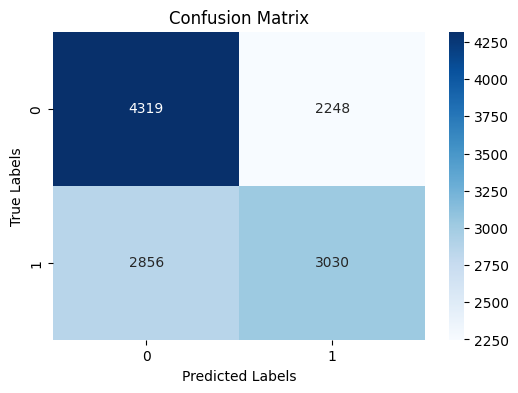

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
print('Model Accuracy:', accuracy_score(y_true, y_pred))

Model Accuracy: 0.5901389223480286


In [24]:
print('recall: ', recall_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred))

recall:  0.5147808358817533
precision:  0.5740810913224706


### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(transformed_data, y_train)

y_pred = rf_classifier.predict(transformed_data_test)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6159961455071067


In [27]:
print('recall: ', recall_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred))

recall:  0.5424736663268773
precision:  0.6045058689890193


In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(transformed_data, y_train)

y_pred = knn_classifier.predict(transformed_data_test)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5439653095639605


### Decision Tree

In [29]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2)


decision_tree.fit(transformed_data, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(transformed_data_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6016220990925881


## Inference
After completing the initial model development phase, we observed that the selected models achieved modest results. The accuracy barely exceeded 0.60, while both recall and
precision for Logistic Regression were below 0.6. The Random Forest model achieved a precision of up to 0.6, but the KNN model exhibited the poorest performance.

However, an accuracy of 0.6 or lower in this type of machine learning task is not particularly beneficial.

In the next stage, we will explore various feature selection techniques to identify additional features that might lead to improvements in performance, if any.

## Stage: 2

## Feature Selection

in this section, we will employ three method to determine feature importance for our feature selection process

1. Feature importance in a predictive model: We employ predictive models such as decision trees or random forests. These models can provide insights into the importance or relevance of categorical features in predicting the target variable.

2. Chi-square test: The chi-square test is a statistical test that can be used to assess the independence between two categorical variables. It determines if there is a significant association or relationship between the variables. The scipy.stats.chisquare() function in SciPy can be used to perform a chi-square test and obtain the test statistic and p-value.

3. Lastly, we use the point biserial correlation coefficient

### 1. Using Predictive Model (Descision Tree)

In [30]:
importances = decision_tree.feature_importances_
importances.shape

(195,)

                     Feature  Importance
194                  eqpdays    0.310213
169                   months    0.280347
130               change_mou    0.071325
122                 mou_Mean    0.060756
123              totmrc_Mean    0.049042
..                       ...         ...
68     area_LOS ANGELES AREA    0.000000
69         area_MIDWEST AREA    0.000000
70     area_NEW ENGLAND AREA    0.000000
71   area_NEW YORK CITY AREA    0.000000
97                  ethnic_H    0.000000

[195 rows x 2 columns]


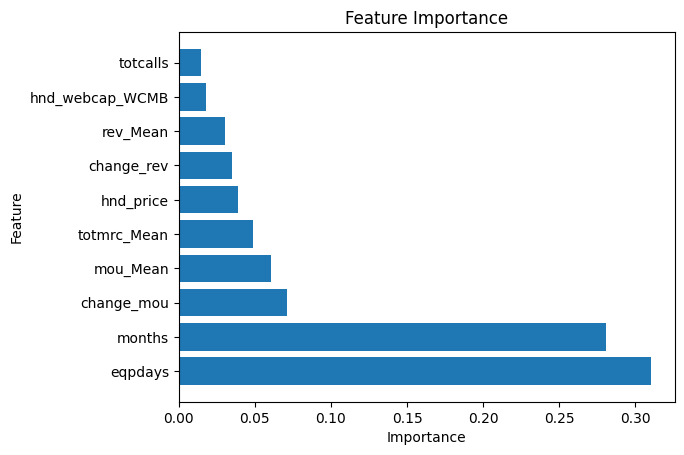

In [31]:
# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': importances})

# Sort the DataFrame by importance values in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances)

# Plot feature importances
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [32]:
indexed_feature_import = feature_importances.set_index('Feature')
indexed_feature_import= indexed_feature_import.T
indexed_feature_import.drop(columns=numerical_features, inplace=True)

In [33]:
indexed_feature_import = indexed_feature_import.T
indexed_feature_import.reset_index(inplace=True)

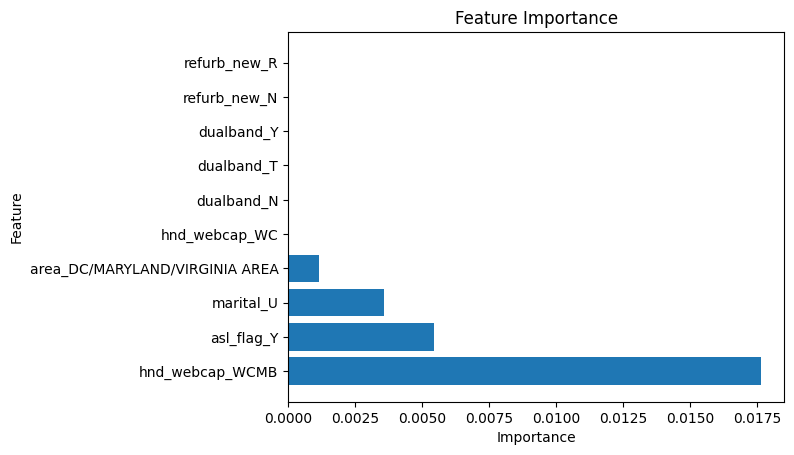

In [34]:
indexed_feature_import = indexed_feature_import.sort_values(by='Importance', ascending=False)

plt.barh(indexed_feature_import['Feature'][:10], indexed_feature_import['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

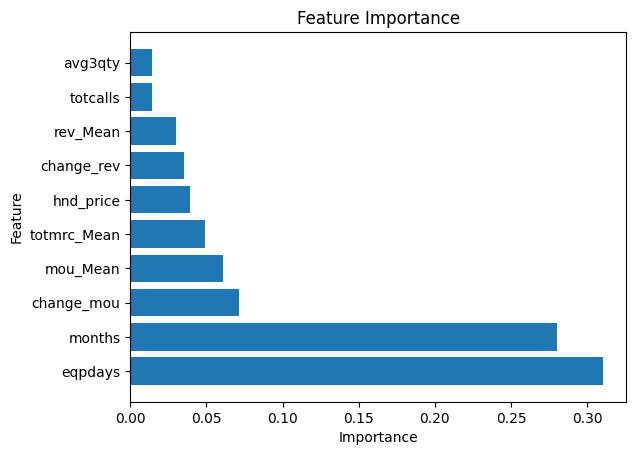

In [35]:
num_feature_importance = feature_importances[feature_importances['Feature'].isin(numerical_features)]
num_feature_importance = num_feature_importance.sort_values(by='Importance', ascending=False)

plt.barh(num_feature_importance['Feature'][:10], num_feature_importance['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

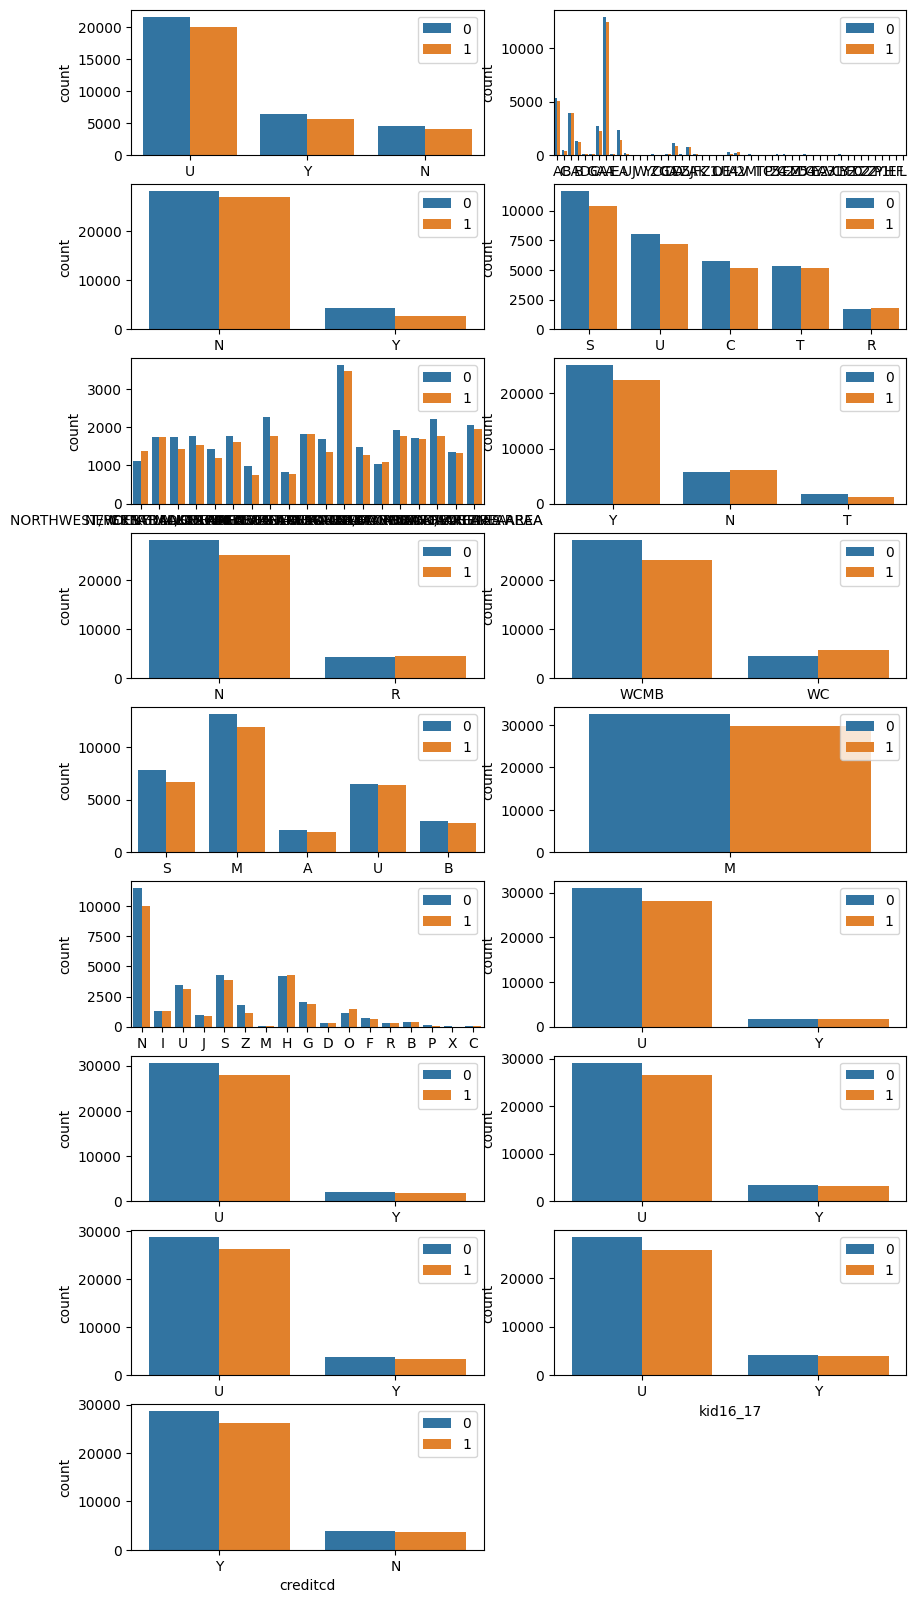

In [36]:
fig = plt.figure(figsize=(10, 20))
for i, cols in enumerate(categorical_features):
    ax = plt.subplot(9,2,i+1)
    sns.countplot(x= cols, hue="churn", data=df_origin, ax=ax)
    plt.legend()
plt.show()

In [37]:
from scipy.stats import chi2_contingency

### 2. Using Chi-Square

In [38]:
selected_cat_features = []
for feature in categorical_features:
    contingency_table = pd.crosstab(df_origin[feature], df_origin['churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p <= 0.05:
        print(f"Chi-square test results for '{feature}':")
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p}")
        print("")
        selected_cat_features.append(feature)

Chi-square test results for 'crclscod':
Chi-square statistic: 369.43351722676226
P-value: 2.7670942737132325e-50

Chi-square test results for 'asl_flag':
Chi-square statistic: 279.27002727384775
P-value: 1.0831050236016552e-62

Chi-square test results for 'prizm_social_one':
Chi-square statistic: 27.72367279525323
P-value: 1.4189053285297057e-05

Chi-square test results for 'area':
Chi-square statistic: 183.98688671828774
P-value: 1.5535358326735172e-29

Chi-square test results for 'dualband':
Chi-square statistic: 97.40527077178147
P-value: 7.058528909106948e-22

Chi-square test results for 'refurb_new':
Chi-square statistic: 77.9106617456923
P-value: 1.0780790009133188e-18

Chi-square test results for 'hnd_webcap':
Chi-square statistic: 352.69643190901684
P-value: 1.0963764527558574e-78

Chi-square test results for 'marital':
Chi-square statistic: 28.095361412052313
P-value: 1.192997004662019e-05

Chi-square test results for 'ethnic':
Chi-square statistic: 268.98978049842714
P-value:

### 3. Using Pearson and Biserial Correlation

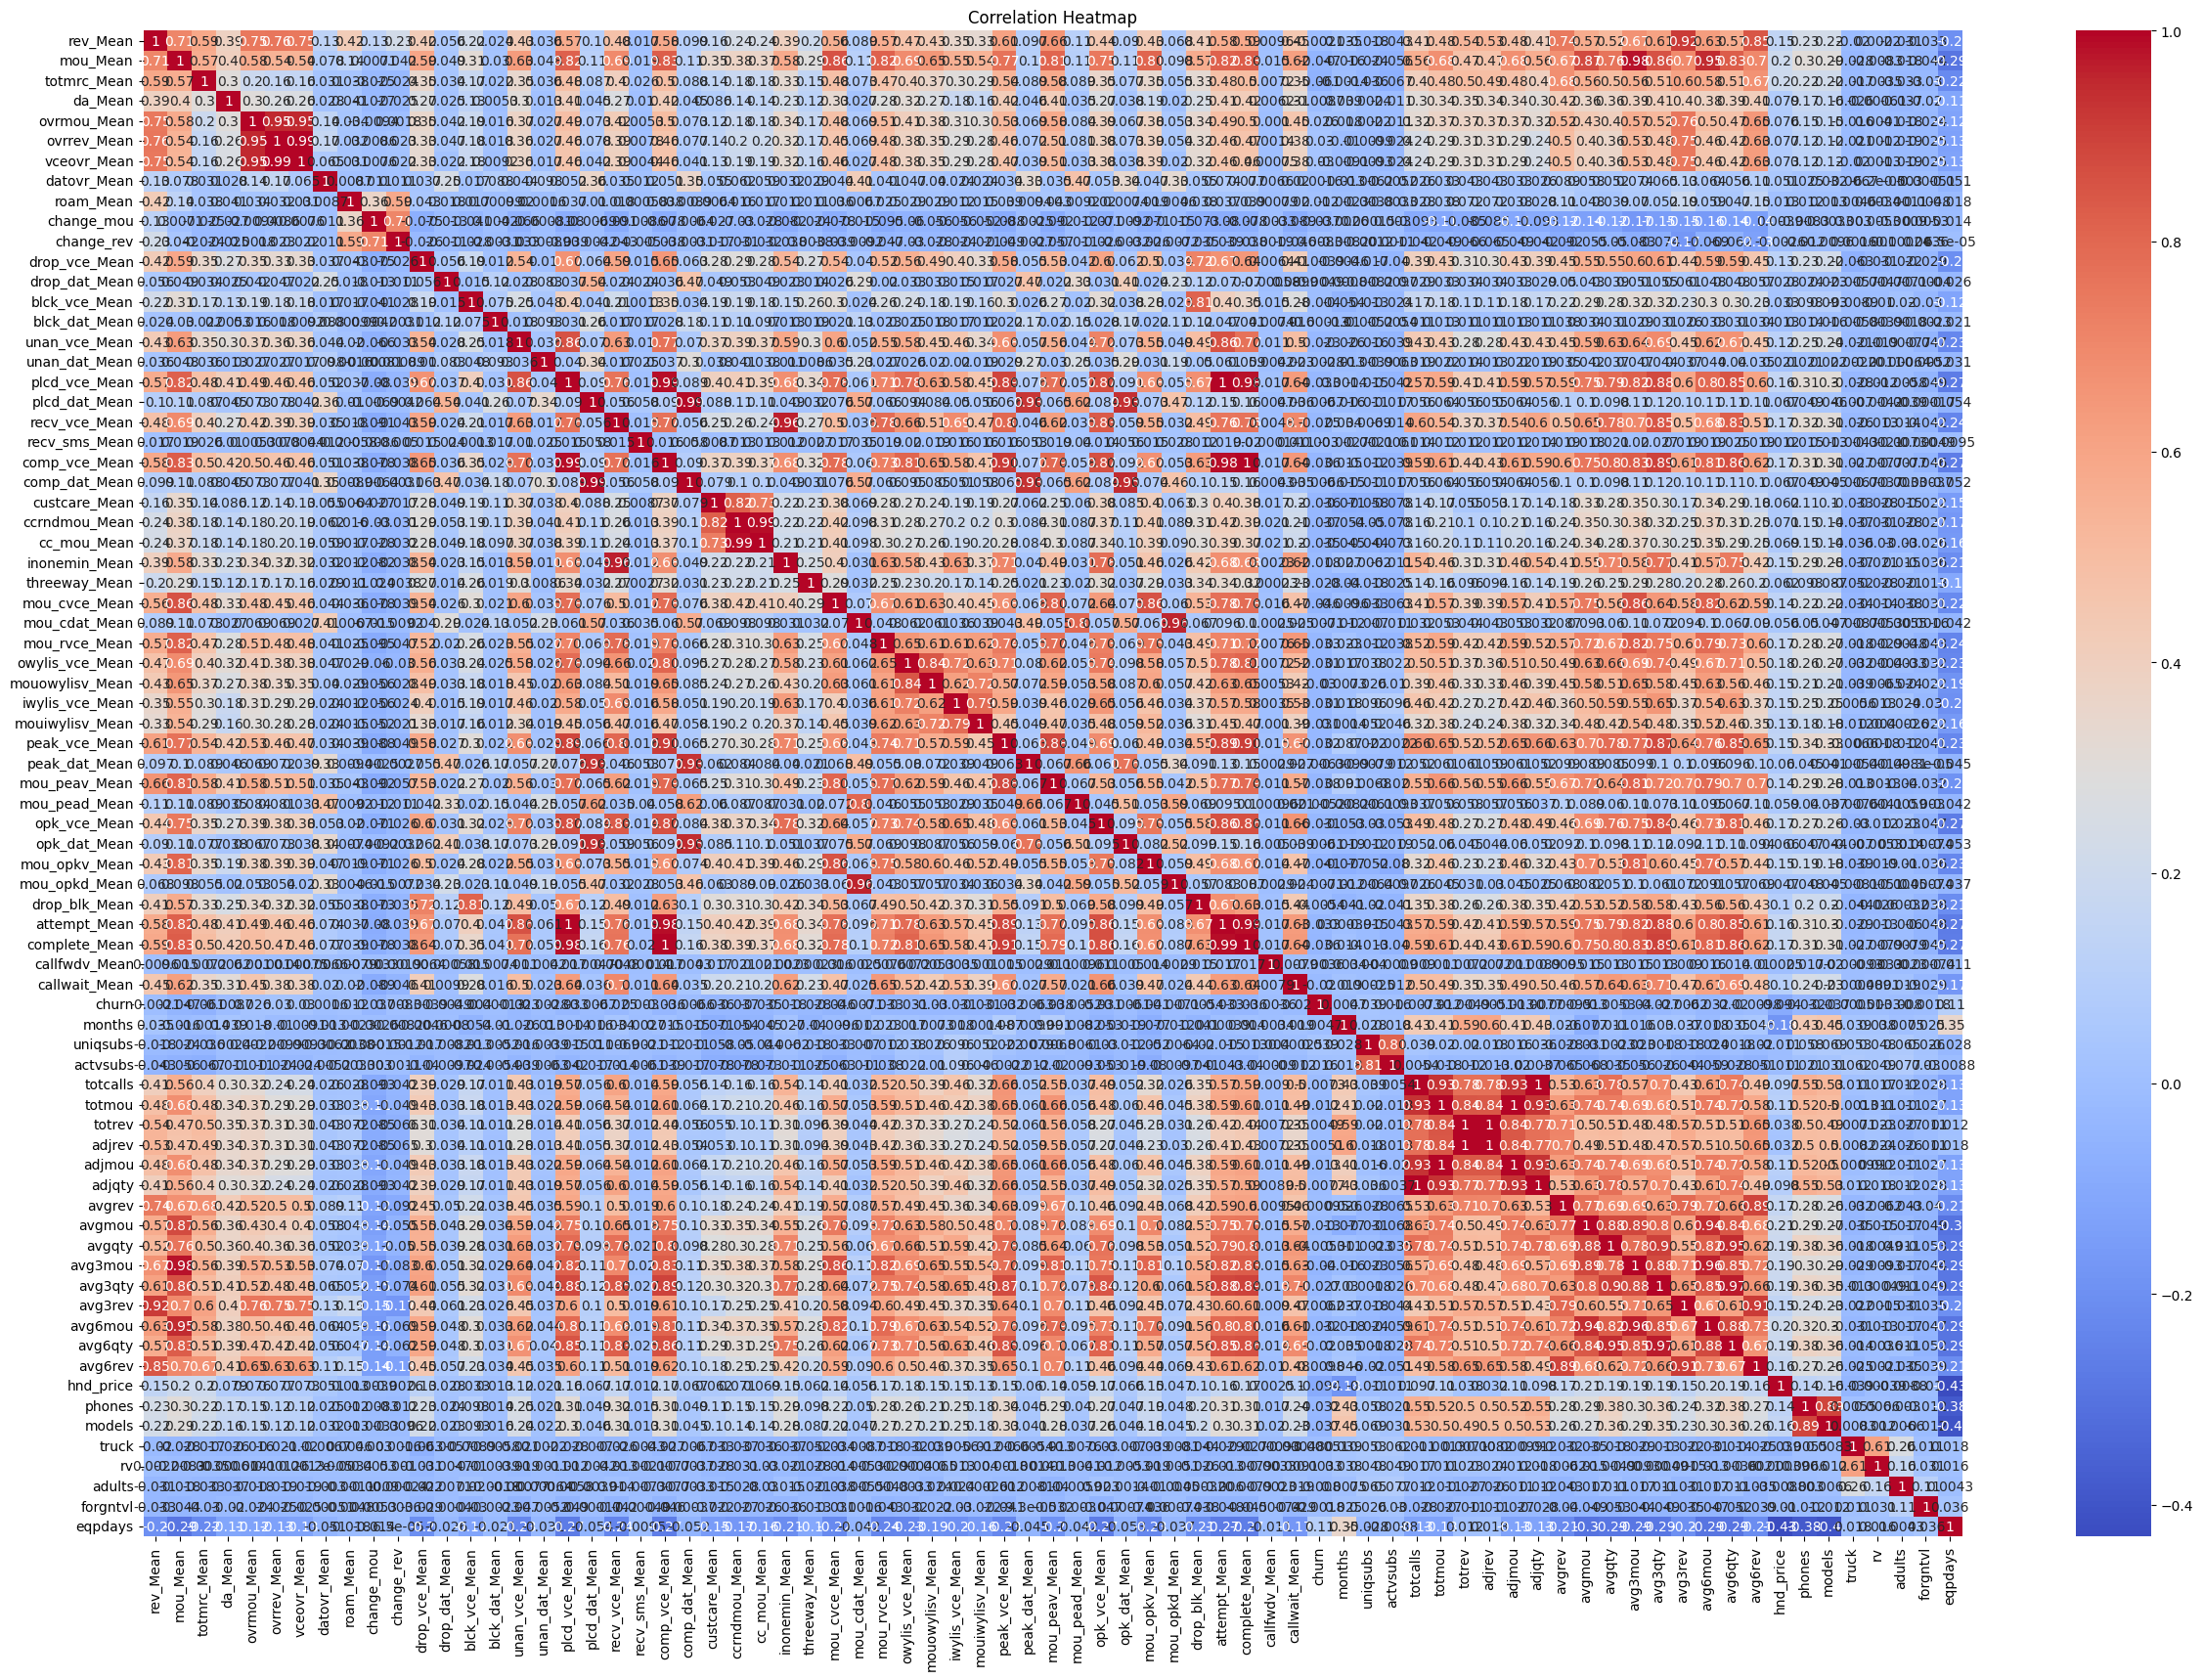

In [39]:
corr_matrix = df_origin.corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
corr_matrix['churn']

rev_Mean      -0.002135
mou_Mean      -0.046711
totmrc_Mean   -0.060811
da_Mean       -0.008738
ovrmou_Mean    0.026071
                 ...   
truck         -0.000509
rv             0.003347
adults        -0.008018
forgntvl      -0.001821
eqpdays        0.105792
Name: churn, Length: 75, dtype: float64

In [41]:
import scipy.stats as stats

In [42]:
selected_num_features = []
for features in numerical_features:
    numerical_variable = df_origin[features]
    categorical_variable = df_origin['churn']

    correlation, p_value = stats.pointbiserialr(numerical_variable, categorical_variable)
    
    if correlation >= 0.1 or correlation <= -0.2 or p_value <= 0.04:

        print("Point Biserial Correlation Coefficient:", correlation)
        print("p-value:", p_value)
        selected_num_features.append(features)

Point Biserial Correlation Coefficient: -0.046711467083536545
p-value: 2.001292703244985e-31
Point Biserial Correlation Coefficient: -0.06081097758934165
p-value: 4.285840843948306e-52
Point Biserial Correlation Coefficient: -0.008738321943212205
p-value: 0.029228015585357557
Point Biserial Correlation Coefficient: 0.026070747667938515
p-value: 7.708158797846485e-11
Point Biserial Correlation Coefficient: 0.030267009620243084
p-value: 4.225776122754462e-14
Point Biserial Correlation Coefficient: 0.030473897512932467
p-value: 2.837881542669182e-14
Point Biserial Correlation Coefficient: 0.011713573491772884
p-value: 0.0034686527918638957
Point Biserial Correlation Coefficient: -0.03715612055386134
p-value: 1.7884177385172022e-20
Point Biserial Correlation Coefficient: 0.008275336408545098
p-value: 0.03893543501843214
Point Biserial Correlation Coefficient: -0.02307878755941976
p-value: 8.44604370741906e-09
Point Biserial Correlation Coefficient: -0.03290677909733316
p-value: 2.157124752

In [43]:
len(selected_cat_features), len(selected_num_features)

(11, 45)

In [44]:
len(categorical_features), len(numerical_features)

(17, 74)

## Extracting Selected Features and Preprocessing Data

In [45]:
all_selected_features = selected_cat_features + selected_num_features + ['churn']

In [46]:
df_selected = df_origin[all_selected_features]
df_selected.head()

crclscod asl_flag prizm_social_one                           area dualband  \
0         A        N                S  NORTHWEST/ROCKY MOUNTAIN AREA        Y   
4         A        N                U               NEW ENGLAND AREA        Y   
5         C        N                U               GREAT LAKES AREA        N   
9         A        N                C                    DALLAS AREA        Y   
10        A        N                C                    DALLAS AREA        Y   

   refurb_new hnd_webcap marital ethnic kid0_2  ... avg3mou  avg3qty  avg6mou  \
0           N       WCMB       S      N      U  ...     272      116    322.0   
4           N       WCMB       S      I      U  ...     558      191    586.0   
5           N       WCMB       S      U      U  ...    1260      960   1187.0   
9           N       WCMB       M      N      U  ...       6        3     54.0   
10          N       WCMB       S      N      Y  ...      90       16    123.0   

    avg6qty  avg6rev  hnd_price  phones  models  eqpdays  churn  
0     136.0     38.0  149.98999     2.0     2.0    361.0      1  
4     196.0     80.0  149.98999     6.0     4.0    434.0      0  
5     853.0     78.0  129.98999     9.0     4.0    458.0      0  
9       7.0     34.0   79.98999     2.0     2.0    601.0      0  
10     32.0     64.0   79.98999     3.0     3.0    464.0      0  

[5 rows x 57 columns]

In [47]:
df_2 = df_selected.copy()

df_y = df_2.pop('churn')

# Categorical Features

data_types = df_2.dtypes
categorical_features = data_types[data_types == 'object'].index

# Numerical Features

data_types = df_2.dtypes
numerical_features = data_types[data_types != 'object'].index

In [48]:
categorical_features

Index(['crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband',
       'refurb_new', 'hnd_webcap', 'marital', 'ethnic', 'kid0_2', 'kid16_17'],
      dtype='object')

In [49]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df_2, df_y, test_size=0.2, random_state=44)

categorical_features = categorical_features.tolist()
numerical_features = numerical_features.tolist()

In [50]:
categorical_features

['crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'marital',
 'ethnic',
 'kid0_2',
 'kid16_17']

In [51]:
# Create transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(x_train)
transformed_data = pipeline.transform(x_train)
transformed_data_test = pipeline.transform(x_test)

In [52]:
transformed_feature_names = pipeline.get_feature_names_out().tolist()

transformed_feature_names = strip_tag_transformer(transformed_feature_names)

## Model Fitting, Prediction and Evaluation

### Logisitic Regression

In [53]:
lr = LogisticRegression(max_iter=1000).fit(transformed_data, y_train)

predictions = lr.predict(transformed_data_test)

In [54]:
y_true = y_test
y_pred = predictions
cm = confusion_matrix(y_true, y_pred)

cf_matrix = confusion_matrix(y_true, y_pred)

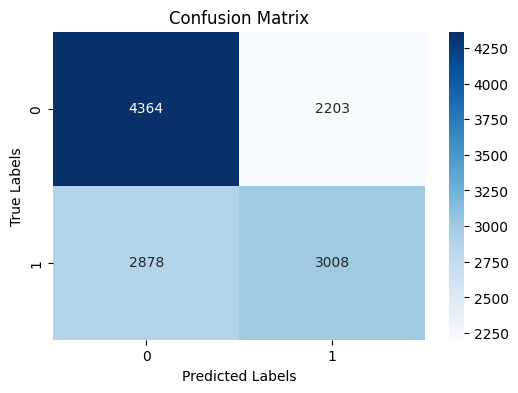

In [55]:
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [56]:
print('Model Accuracy:', accuracy_score(y_true, y_pred))

Model Accuracy: 0.5919858668593914


In [58]:
print('recall: ', recall_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred))

recall:  0.5110431532449881
precision:  0.5772404528881213


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.66      0.63      6567
           1       0.58      0.51      0.54      5886

    accuracy                           0.59     12453
   macro avg       0.59      0.59      0.59     12453
weighted avg       0.59      0.59      0.59     12453



### Random Forest Classifier

In [61]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(transformed_data, y_train)

y_pred = rf_classifier.predict(transformed_data_test)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6106962177788484


In [62]:
print('recall: ', recall_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred))

recall:  0.5254841997961264
precision:  0.6008158508158508


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65      6567
           1       0.60      0.53      0.56      5886

    accuracy                           0.61     12453
   macro avg       0.61      0.61      0.61     12453
weighted avg       0.61      0.61      0.61     12453



### Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

2023-07-05 12:04:41.812381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 12:04:42.621996: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-05 12:04:42.622056: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-05 12:04:44.421595: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [ ]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=transformed_data.shape[1]),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(transformed_data, y_train, epochs=15, batch_size=32, validation_data=(transformed_data_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(transformed_data_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/15
1557/1557 [==============================] - 3s 2ms/step - loss: 0.6878 - accuracy: 0.5475 - val_loss: 0.6799 - val_accuracy: 0.5682
Epoch 2/15
1557/1557 [==============================] - 3s 2ms/step - loss: 0.6742 - accuracy: 0.5792 - val_loss: 0.6733 - val_accuracy: 0.5823
Epoch 3/15
1557/1557 [==============================] - 3s 2ms/step - loss: 0.6694 - accuracy: 0.5879 - val_loss: 0.6699 - val_accuracy: 0.5869
Epoch 4/15
1557/1557 [==============================] - 3s 2ms/step - loss: 0.6660 - accuracy: 0.5957 - val_loss: 0.6679 - val_accuracy: 0.5915
Epoch 5/15
1557/1557 [==============================] - 3s 2ms/step - loss: 0.6637 - accuracy: 0.5981 - val_loss: 0.6664 - val_accuracy: 0.5915
Epoch 6/15
1557/1557 [==============================] - 3s 2ms/step - loss: 0.6616 - accuracy: 0.6024 - val_loss: 0.6657 - val_accuracy: 0.5979
Epoch 7/15
1557/1557 [==============================] - 3s 2ms/step - loss: 0.6601 - accuracy: 0.6045 - val_loss: 0.6650 - val_accuracy:

## Inference and Conlusion

At the conclusion of this notebook, we have observed no significant improvements in the performance of our models, despite implementing various preprocessing techniques.

While there are numerous other approaches for feature selection and engineering, for the sake of brevity, we will retain the steps already employed in this analysis.

One might question the significance of this notebook when the model did not meet expectations. It's natural to wonder if the preprocessing technique employed was flawed or if alternative techniques could yield better results. These are valid concerns.

Since we haven't explored all possible feature selection techniques in this notebook, our goal will be to replicate the same approach in the next notebook. By doing so, we can assess the extent to which data quality influences performance and evaluate the impact of simple data preprocessing techniques.

## --->> Head over to the next notebook!